In [0]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

import pandas as pd
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
stock_data = pd.read_csv("AAPL.csv")
stock_data.tail()



,Date,Open,High,Low,Close,Adj Close,Volume
246,2019-08-30,210.160004,210.449997,207.199997,208.740005,208.740005,21143400
247,2019-09-03,206.429993,206.979996,204.220001,205.699997,205.699997,20023000
248,2019-09-04,208.389999,209.479996,207.320007,209.190002,209.190002,19188100
249,2019-09-05,212.000000,213.970001,211.509995,213.279999,213.279999,23913700
250,2019-09-06,214.050003,214.419998,212.509995,213.259995,213.259995,19350800


In [6]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,192.210916,194.264861,190.205617,192.233148,190.616901,3.260504e+07
std,21.103763,21.256209,20.986018,21.047795,20.845204,1.392422e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.805000,175.934998,173.555000,174.794998,173.366134,2.290740e+07
50%,196.419998,198.850006,193.820007,197.000000,195.501465,2.966390e+07
75%,207.574997,209.194999,205.274994,207.610001,206.495002,3.890535e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


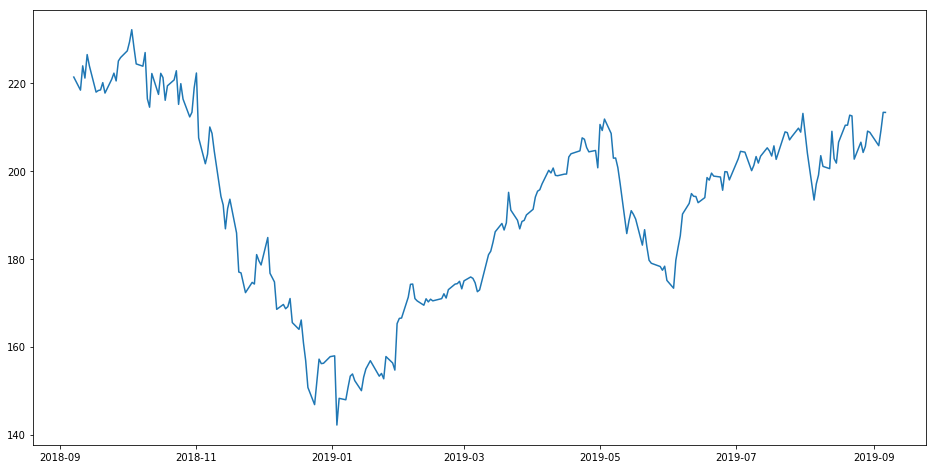

In [7]:
#setting index as date
stock_data['Date'] = pd.to_datetime(stock_data.Date,format='%Y-%m-%d')
stock_data.index = stock_data['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(stock_data['Close'], label='Close Price history')

In [8]:
#get nrow for training/testing
nrow = len(stock_data)
nrow

251

In [79]:
#sorting
data = stock_data.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(stock_data)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
new_data.head()

,Date,Close
0,2018-09-07 00:00:00,221.3
1,2018-09-10 00:00:00,218.33
2,2018-09-11 00:00:00,223.85
3,2018-09-12 00:00:00,221.07
4,2018-09-13 00:00:00,226.41


In [0]:
#create features (not working)
#from fastai.structured import  add_datepart
#add_datepart(new_data, 'Date')
#new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [0]:
new_data['Date'] = new_data['Date'].apply(lambda x: x.strftime('%d%m%Y'))

In [0]:
#split into train and validation
train_nbr = nrow*(2/3)
train_nbr = int(round(train_nbr))
train = new_data[:train_nbr]
valid_nbr = nrow/3
valid_nbr = int(round(train_nbr))
valid = new_data[valid_nbr:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']



In [81]:
valid.tail()

,Date,Close
246,2019-08-30 00:00:00,208.74
247,2019-09-03 00:00:00,205.7
248,2019-09-04 00:00:00,209.19
249,2019-09-05 00:00:00,213.28
250,2019-09-06 00:00:00,213.26


In [35]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print("RMSE for Linear Regression:", rms)

RMSE for Linear Regression: 14.18551343788883


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


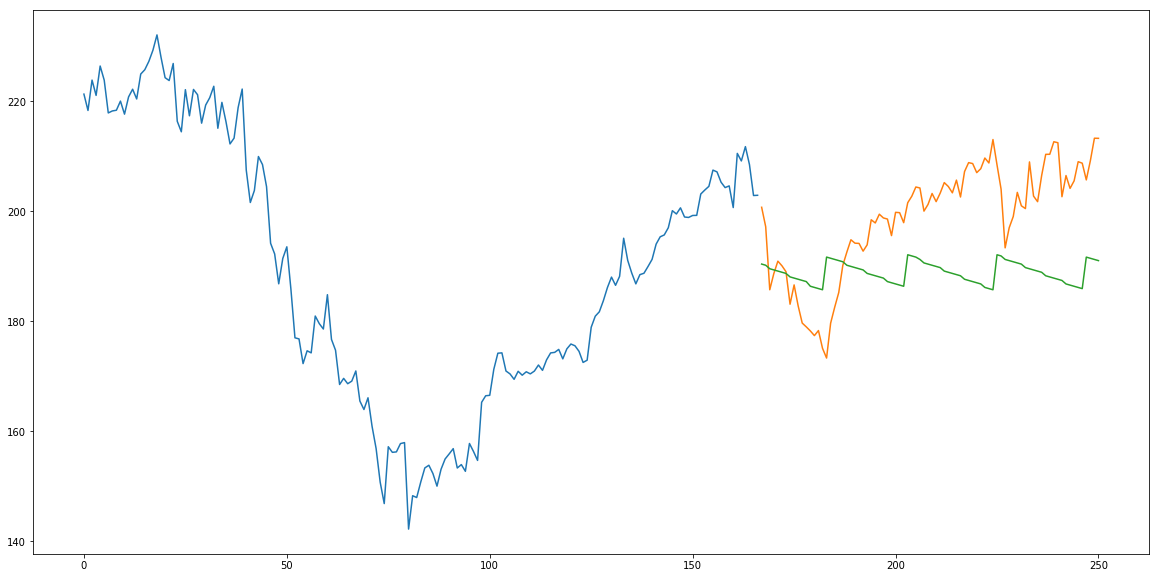

In [37]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[valid_nbr:].index
train.index = new_data[:train_nbr].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [0]:
#split into train and validation
train_nbr = nrow*(2/3)
train_nbr = int(round(train_nbr))
train_rr = new_data[:train_nbr]
valid_nbr = nrow/3
valid_nbr = int(round(train_nbr))
valid_rr = new_data[valid_nbr:]

x_train_rr = train_rr.drop('Close', axis=1)
y_train_rr = train_rr['Close']
x_valid_rr = valid_rr.drop('Close', axis=1)
y_valid_rr = valid_rr['Close']


In [65]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=145)
rr.fit(x_train_rr, y_train_rr)

Ridge(alpha=145, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
#make predictions and find the rmse
preds_rr = rr.predict(x_valid_rr)
rms_rr=np.sqrt(np.mean(np.power((np.array(y_valid_rr)-np.array(preds_rr)),2)))
print("RMSE for Ridge Regression:", rms_rr)

RMSE for Ridge Regression: 14.185513437888813


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


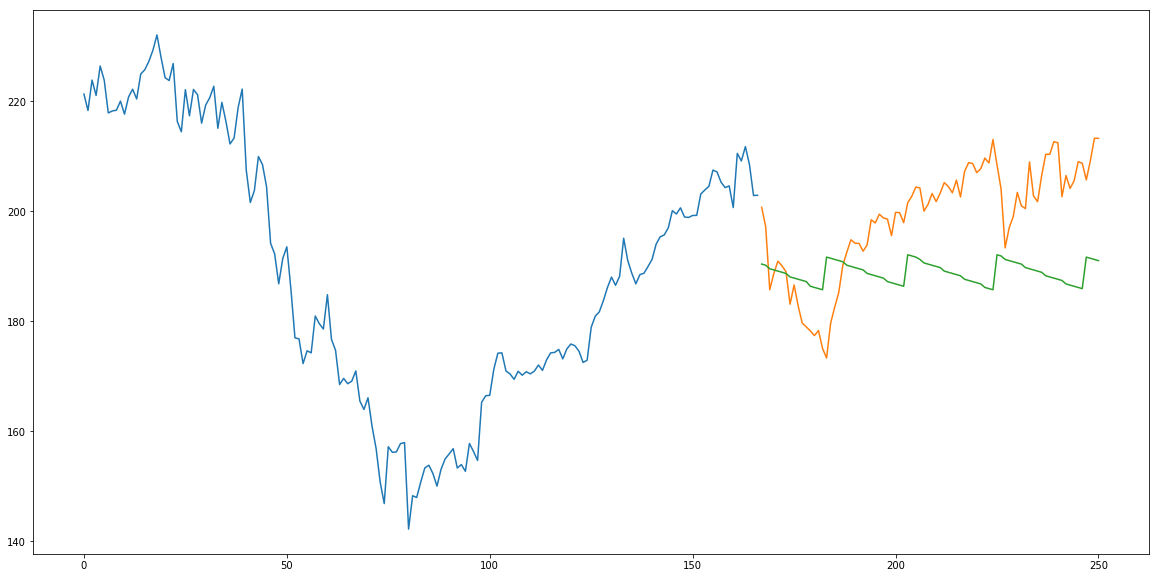

In [67]:
#plot
valid_rr['Predictions'] = 0
valid_rr['Predictions'] = preds_rr

valid_rr.index = new_data[valid_nbr:].index
train_rr.index = new_data[:train_nbr].index

plt.plot(train_rr['Close'])
plt.plot(valid_rr[['Close', 'Predictions']])

In [76]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(x_train, y_train)
#make predictions and find the rmse
preds_lasso = lasso.predict(x_valid_rr)
rms_lasso=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds_lasso)),2)))
print("RMSE for Lasso Regression:", rms_lasso)

RMSE for Lasso Regression: 14.18551341748707


In [77]:
print(rms , rms_rr, rms_lasso)

14.18551343788883 14.185513437888813 14.18551341748707


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


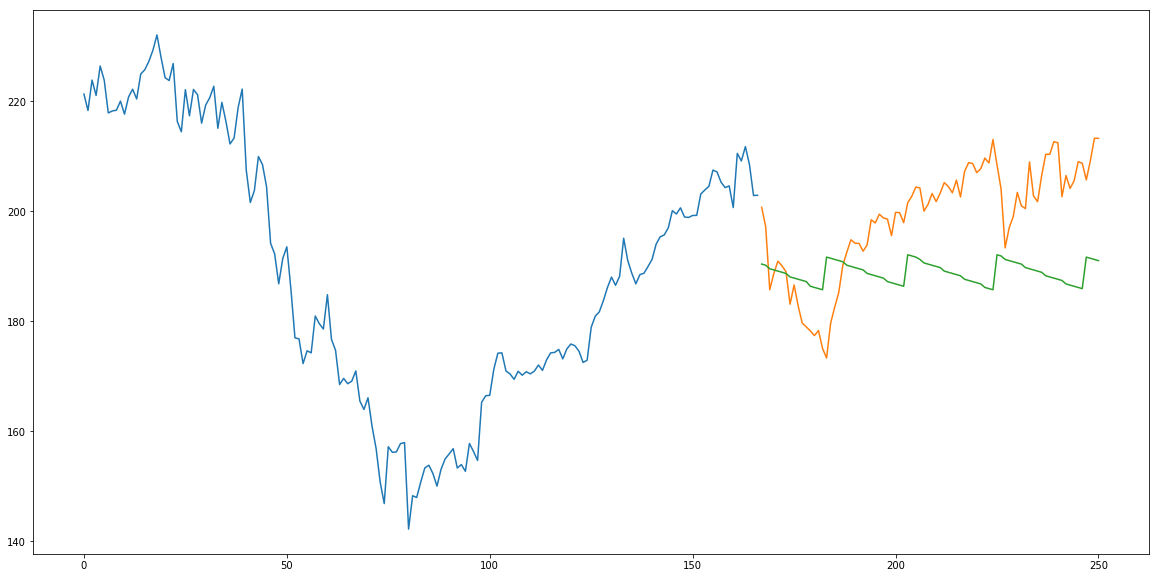

In [75]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds_rr

valid.index = new_data[valid_nbr:].index
train.index = new_data[:train_nbr].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])